In [618]:
import matplotlib.pyplot as plt
import numpy as np

In [619]:
# Mean squared error from residual
def mse_from_e(residual):
    ##
    return np.mean(residual**2)  # finding the mean of squared error vector residual                            ## ACT1
    ##

# Mean Squared Error of X.w - y
def mean_squared_error(X, y, w):
    ##
    # first getting y_hat and then tacking difference from y
    # than finding mean of squared error
    return np.mean((np.dot(X,w) - y)**2)                               ## ACT2
    ##

X = np.array([[1, 1, 1, 1, 0]])
y = np.array([9.99])
w = np.array([0.0000, 0.0201, -0.0402, 0.0603, -0.0804])
assert(mse_from_e(np.array([[-9.09], [4.27], [-2.36]])) == np.mean(np.array([[-9.09], [4.27], [-2.36]])**2))
assert(mse_from_e(np.array([[9.78], [-8.35], [-2.65]])) == np.mean(np.array([[9.78], [-8.35], [-2.65]])**2))
assert(mean_squared_error(X, y, w) == np.mean((np.dot(X,w) - y)**2))


In [620]:
# Generate a sawtooth weight vector
def genu(d, m):
    u = np.arange(d) * (2 * (np.arange(d) % 2) - 1)
    u = m * u / np.sqrt(np.dot(u, u))
    return u

# Generate random data
def genx(n, d):
    X = np.random.randint(0, 2, (n, d))
    X[:,int(d/2)] = 1
    return X

# Generate targets and add noise
def gent(X, u, noise):
    n = X.shape[0]
    y = np.dot(X, u).reshape(n, 1)
    y += noise * np.var(y) * np.random.randn(n, 1)
    return y

# Generate data, weights, and targets
def gimme_data_regres(n, d, noise=0.1):
    u = genu(d, 1.0)
    X = genx(n, d)
    y = gent(X, u, noise)
    mse_gen = mean_squared_error(X, y, u)
    print('Generator Loss={0:8.5f}\n'.format(mse_gen))
    return X, u, y

In [621]:
# Plot loss as a function of epoch
use_notebook = False
def loss_plotter(vlist, fname):
    vr = vlist[0]
    vn = vlist[1]
    if not use_notebook:
        plt.figure(fname)
        plt.plot(range(1, 1+len(vr)), vr,
            range(1, 1+len(vn)), vn,
            linewidth=2, linestyle='-', marker='o')
        plt.legend(('rep', 'nor'))
        plt.grid()
        xt = np.arange(1, 1 + max(len(vr), len(vn)))
        _ = plt.xticks(xt)
        _ = plt.xlabel('Epoch', fontsize=14)
        _ = plt.ylabel(fname, fontsize=14)
    if use_notebook:
        plt.show(block=False)
    return

# Scatter plot of predicted vs. observed targets
def loss_scatter(X, y, w, fname):
    if not use_notebook:
        plt.figure(fname)
        plt.scatter(y, X.dot(w), edgecolors=(0,0,0))
        plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
        plt.grid()
        plt.xlabel('$y$', fontsize=14)
        plt.ylabel('$\hat{y}$', fontsize=14)
    if use_notebook:
        plt.show(block=False)

In [622]:
# sample new index (w/ or w/o replacement)
def sample_new_index(d, replace=1):
    if replace:
        ##
        # getting int number between 0  to d
        ind = np.random.randint(d)              ## ACT3
        ##
    else:
        if 'prm' not in sample_new_index.__dict__:
            sample_new_index.prm = np.random.permutation(d)
            sample_new_index.head = 0
            ind = sample_new_index.prm[sample_new_index.head]
        ##
        # getting all the elemant of prm array one by one where all the elements of prm are less than d
        else:
            ind = sample_new_index.prm[sample_new_index.head]            ## ACT4
            sample_new_index.head += 1 # increasing head by 1 every time
        ##
        
        if sample_new_index.head == d:
            sample_new_index.head = 0
            del sample_new_index.prm
    return ind


assert(0 <= sample_new_index(6) < 6)
assert(0 <= sample_new_index(8) < 8)

In [623]:
# calculate the change to w[j] wrt current margins z
# xjs is the squared norm of the jth column of X, a.k.a. ||xj||^2
def delta_wj(e, xj, xjs):
    ##
    # finding delta a
    # tacking dot product of e transpose and xj. After that dividing by xjs
    return -np.dot(e.T,xj)/xjs                ## ACT5
    ##

# Return new values for w[j] and residual
def update(wj, e, xj, xjs):
    ##
    # tacking dot product of e transpose and xj. After that dividing by xjs
    a = -np.dot(e.T,xj)/xjs
    # returning new w[j] and new error
    return wj + a, (e + a*xj)                     ## ACT6
    ##

e = np.array([[-9.09], [4.27], [-2.36]])
xj = np.array([1, 1, 1])
xjs = np.array([1, 1, 1])
wj = np.array([1, 1, 1])
wja, eaxj = update(wj, e, xj, xjs)
assert np.all(delta_wj(e, xj, xjs) == -np.dot(e.T,xj)/xjs)
assert np.all(wja == wj + (-np.dot(e.T,xj)/xjs))
assert np.all(eaxj == e + (-np.dot(e.T,xj)/xjs)*xj)

In [624]:
# Initialize all variables using the zero vector for w
# (Initialize w as the zero vector)
# You should return w, xjs, residual
def initialize(X, y):
    ##
    # first one is a weight vector with all entries 0 and dimention is d cross 1.
    # second is the nor of column vector on X
    # -y is the error
    return np.zeros(X.shape[1]), np.sum(X**2, axis=0), -y          ## ACT7
    ##

X = np.array([[1, 1, 1, 1, 0]])
y = np.array([9.09])
w, xjs, residual = initialize(X, y)
assert np.all(w == np.zeros(X.shape[1]))
assert np.all(xjs == np.sum(X**2, axis=0))
assert np.all(residual == -y)

In [625]:
# Check whether termination condition is met
def mse_check(mse_p, mse_c, eps):
    ##
    # this return true if the error is Termination otherwise false
    return (mse_p - mse_c)/mse_c >= eps  and  (mse_p - mse_c)/mse_c <= 0.1    ## ACT8
    ##
mse_p = 0.3112
mse_c = 0.1943
eps = 0.0001
assert(mse_check(mse_p, mse_c, eps) == ((mse_p - mse_c)/mse_c >= eps  and  (mse_p - mse_c)/mse_c <= 0.1))

In [626]:
# Linear regression using coordinate decent
def linear_regression_cd(X, y, epochs=100, eps=0.001, replace=1):
    w, xjs, residual = initialize(X, y)
    mse_cd = [mse_from_e(residual)]
    n, d = X.shape
    for e in range(d * epochs):
        j = sample_new_index(d, replace)
        xj = X[:,j].reshape(n, 1)
        w[j], residual = update(w[j], residual, xj, xjs[j])
        if (e + 1) % d == 0:
            mse_cd.append(mse_from_e(residual))
            print('Epoch: {0:2d}  MSE: {1:5.3f}'.format(int((e+1)/d), mse_cd[-1]))
            if mse_check(mse_cd[-2], mse_cd[-1], eps): break
    return w, mse_cd

Generator Loss= 0.55901

Epoch:  1  MSE: 0.194
Epoch:  2  MSE: 0.130
Epoch:  3  MSE: 0.084
Epoch:  4  MSE: 0.078
Epoch:  1  MSE: 0.134
Epoch:  2  MSE: 0.078
Epoch:  3  MSE: 0.065
Epoch:  4  MSE: 0.061


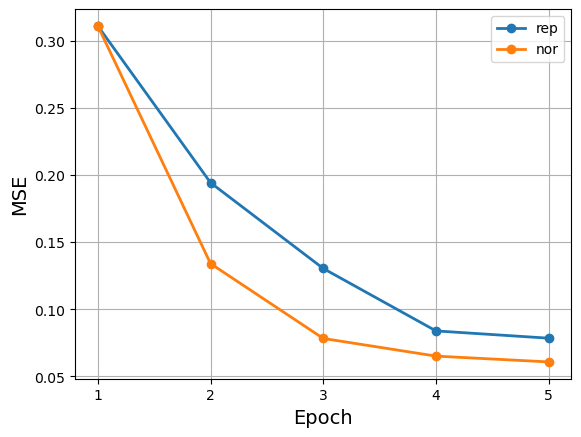

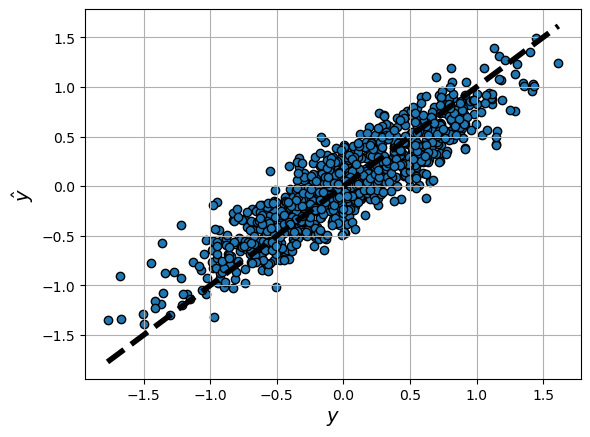

In [627]:
# ---------------- Main for linear regression using Coordinate Descent --------------

np.random.seed(17)
n, d, noise = 1000, 20, 1.0
myeps = 1e-4

[X, u, y] = gimme_data_regres(n, d, noise)

mse_list = []
[wr, mse_r] = linear_regression_cd(X, y, eps=myeps)
mse_list.append(mse_r)
[wn, mse_n] = linear_regression_cd(X, y, eps=myeps, replace=0)
mse_list.append(mse_n)

if not use_notebook:
    plt.close('all')
loss_plotter(mse_list, 'MSE')
loss_scatter(X, y, wn, 'True vs. Predicted Outcome')